<a href="https://colab.research.google.com/github/UmarKhattab09/ML-Models-IN-DEPTH/blob/main/SuperVised_ML_Algorithms_Indepth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Linear Regression, Ridge and Lasso in Depth


In [ ]:
### Housing pricing Dataset
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = fetch_california_housing()
dataframe = pd.DataFrame(df.data, columns=df.feature_names).head()
dataframe.shape

(5, 8)

In [ ]:
dataframe = pd.DataFrame(df.data, columns=df.feature_names)
dataframe.head()
dataframe.shape

(20640, 8)

In [ ]:
dataframe['price']=df.target
dataframe

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [ ]:
### Dividing the dataset
X = dataframe.drop('price', axis=1)
y = dataframe.price

In [ ]:
### Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

lin_reg = LinearRegression()
mse=cross_val_score(lin_reg, X, y, scoring='neg_mean_squared_error', cv=5)
mean_mse = np.mean(mse)
print(mse)
print(mean_mse)

[-0.48485857 -0.62249739 -0.64621047 -0.5431996  -0.49468484]
-0.5582901717686546


In [ ]:
### Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
param= {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20]}
ridge_regressor = GridSearchCV(ridge, param, scoring='neg_mean_squared_error', cv=10)
ridge_regressor.fit(X,y)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20]},
             scoring='neg_mean_squared_error')

In [ ]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 20}
-0.5507717238660648


In [ ]:
### Lasso Regression
### Ridge Regression
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso = Lasso()
param= {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,50,55,100]}
lasso_regressor = GridSearchCV(lasso, param, scoring='neg_mean_squared_error', cv=10)
lasso_regressor.fit(X,y)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.537e+03, tolerance: 2.545e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.697e+03, tolerance: 2.438e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.966e+03, tolerance: 2.411e

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1e-15}
-0.5509524296956588


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
### Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
mse=cross_val_score(lin_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
mean_mse = np.mean(mse)
print(mse)
print(mean_mse)

[-0.54099828 -0.49871687 -0.50480739 -0.5200183  -0.55070903]
-0.5230499763383937


In [ ]:
y_pred = lin_reg.predict(X_test)
from sklearn.metrics import r2_score
r2=r2_score(y_test, y_pred)
print(f"R2_SCORE {r2}")

R2_SCORE 0.5970494128783957


In [ ]:
### Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
param= {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20]}
ridge_regressor = GridSearchCV(ridge, param, scoring='neg_mean_squared_error', cv=10)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20]},
             scoring='neg_mean_squared_error')

In [ ]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)
y_pred = ridge_regressor.predict(X_test)
from sklearn.metrics import r2_score
r2=r2_score(y_test, y_pred)
print(f"R2_SCORE {r2}")

{'alpha': 10}
-0.5221728352781317
R2_SCORE 0.5974788633781389


In [ ]:
### Lasso Regression
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso = Lasso()
param= {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,50,55,100]}
lasso_regressor = GridSearchCV(lasso, param, scoring='neg_mean_squared_error', cv=10)
lasso_regressor.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.998e+03, tolerance: 1.655e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.387e+03, tolerance: 1.656e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.085e+02, tolerance: 1.667e

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)
y_pred = lasso_regressor.predict(X_test)
from sklearn.metrics import r2_score
r2=r2_score(y_test, y_pred)
print(f"R2_SCORE {r2}")


{'alpha': 1e-08}
-0.5221889829246941
R2_SCORE 0.5970494218081674


### **Logistic Regression**
- Purpose : Classification Problems(Binary or Multiclass)
- Performance Metrics: Precision,Recall,F-Score

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
df = load_breast_cancer()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
### Dependent Features
dataframe = pd.DataFrame(df.data,columns=df.feature_names)
dataframe.head()

#Independent Features
y = pd.DataFrame(df.target,columns=['Target'])
y.head()

,Target
0,0
1,0
2,0
3,0
4,0


In [ ]:
### Checking if the dataset is balance or imbalance
y.value_counts()

,count
Target,
1,357
0,212


In [ ]:
## Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataframe, y, test_size=0.33, random_state=42)


In [ ]:
from math import log
from sklearn.model_selection import GridSearchCV
params = [{'C':[1,5,10]},{'max_iter':[100,150]}]
model = LogisticRegression(C=100,max_iter=100)
logistic_regressor = GridSearchCV(model,params,scoring='f1',cv=5)
logistic_regressor.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

GridSearchCV(cv=5, estimator=LogisticRegression(C=100),
             param_grid=[{'C': [1, 5, 10]}, {'max_iter': [100, 150]}],
             scoring='f1')

In [ ]:
print(logistic_regressor.best_params_)
print(logistic_regressor.best_score_)

{'max_iter': 150}
0.9539391140716456


In [ ]:
y_pred=logistic_regressor.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
confusion_matrix(y_test,y_pred)


array([[ 63,   4],
       [  4, 117]])

In [ ]:
accuracy_score(y_test,y_pred)

0.9574468085106383

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        67
           1       0.97      0.97      0.97       121

    accuracy                           0.96       188
   macro avg       0.95      0.95      0.95       188
weighted avg       0.96      0.96      0.96       188



### Algorithms In Depth Learned
- Naive Baye (Classification)
-KNN (Classification,Regression)
-Decision Tree(Classification,Regression)


### Performing Decision Tree Classifier

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
import pandas as pd
df = pd.DataFrame(iris.data,columns=iris.feature_names)
y = pd.DataFrame(iris.target,columns=['target'])
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


[Text(0.5, 0.9166666666666666, 'x[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.46153846153846156, 0.8333333333333333, 'True  '),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.5384615384615384, 0.8333333333333333, '  False'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, '

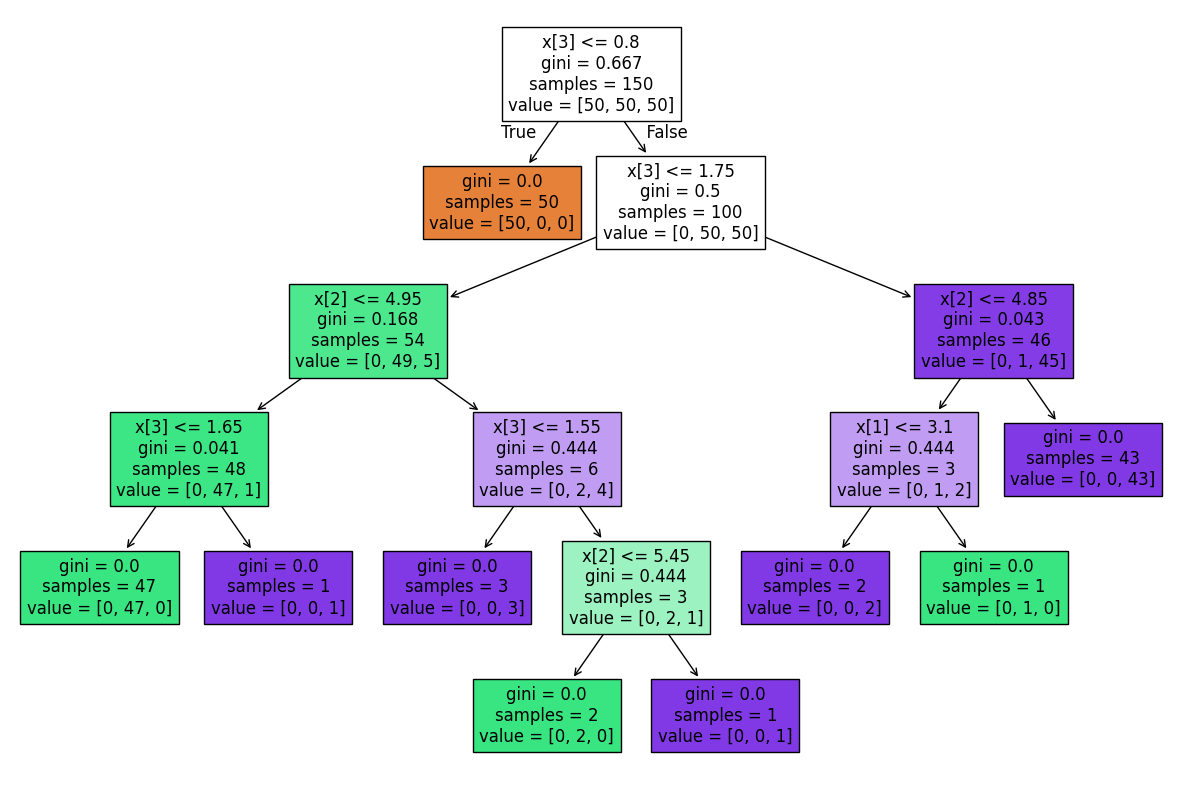

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
classifier = DecisionTreeClassifier()
classifier.fit(df,y)
plt.figure(figsize=(15,10))
tree.plot_tree(classifier,filled=True)

### Ensemble Techniques
1. Bagging
2. Boosting

- Bagging: Models are used in a Parallel. Each Models predict an output and the majority voting is done and the output is selected

- Boosting: Sequential combination of the model is done and the majority voting is done and the output is selected.


#### Random Forest Regressor/Classification:
- It is an example of Bagging where it uses multiple Decision Trees as the models and each Decision Tree provides a output which undergoes a majority voting session and the output is predicted


#### Ada Boost:
- It is an example of Boosting which contains Multiple steps but It also goes under majority voting and it also uses DecisionTree